In [1]:
import xarray as xr


In [18]:
ds=xr.open_zarr('/Users/auraoupa/Work/git/gonzag/zarr_dt_global_alg_sla_vxxc_JFM_2017_SARAL-Altika')

In [19]:
ds

<xarray.Dataset>
Dimensions:         (time: 4124213)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(128882,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(128882,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2016-12-31T23:54:41.742394112 ... 2...
Data variables:
    adt_unfiltered  (time) float64 dask.array<chunksize=(128882,), meta=np.ndarray>
    cycle           (time) int16 dask.array<chunksize=(257764,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(128882,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(257764,), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    NCO:                             20180207
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P23H58M10.204326S
    time_coverage_end:               2017-01-01T23:52:51Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2016-12-31T23:54:41Z
    title:                           DT Altika Drifting Phase Global Ocean Al...

In [21]:
    ds.dims

Frozen(SortedKeysDict({'time': 4124213}))

In [11]:
t=ds['time']

In [17]:
t.values

array(['2016-12-31T23:54:41.742394112', '2016-12-31T23:54:42.798394112',
       '2016-12-31T23:54:43.854394112', ...,
       '2017-03-31T23:29:20.866801920', '2017-03-31T23:29:21.922802176',
       '2017-03-31T23:29:22.978802176'], dtype='datetime64[ns]')

In [22]:
ds=xr.open_zarr('/Users/auraoupa/Work/git/gonzag/zarr_ssh_ORCA1_20170101_20171231_grid_T')

In [35]:
ds

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 362, y: 292)
Coordinates:
    nav_lat       (y, x) float64 dask.array<chunksize=(146, 181), meta=np.ndarray>
    nav_lon       (y, x) float64 dask.array<chunksize=(146, 181), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2017-01-16T12:00:00 ... 2017-...
Dimensions without coordinates: x, y
Data variables:
    ssh           (time_counter, y, x) float32 dask.array<chunksize=(3, 146, 181), meta=np.ndarray>
Attributes:
    About:    Created with SOSIE interpolation environement => https://github...

In [24]:
len(ds.dims)

3

In [26]:
len(ds.nav_lat.dims)

2

In [28]:
import numpy as nmp
cv_coor_test = nmp.array([[ 'lat','latitude', 'nav_lat','gphit','LATITUDE', 'none' ],
                              [ 'lon','longitude','nav_lon','glamt','LONGITUDE','none' ]])

In [29]:
what='latitude'

In [30]:
if   what ==  'latitude': ii = 0
elif what == 'longitude': ii = 1
else: MsgExit(' "what" argument of "GetModelCoor()" only supports "latitude" and "longitude"')
    

In [31]:
print(ii)

0


In [38]:
    for ncvar in cv_coor_test[ii,:]:
        if ncvar in ds.coords: break

In [39]:
ncvar

'nav_lat'

In [41]:
nb_dim = len(ds[ncvar].dims)

In [42]:
print(nb_dim)

2


In [43]:
xwhat = ds[ncvar][:,:]

In [44]:
xwhat

<xarray.DataArray 'nav_lat' (y: 292, x: 362)>
dask.array<xarray-nav_lat, shape=(292, 362), dtype=float64, chunksize=(146, 181), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float64 dask.array<chunksize=(146, 181), meta=np.ndarray>
    nav_lon  (y, x) float64 dask.array<chunksize=(146, 181), meta=np.ndarray>
Dimensions without coordinates: y, x
Attributes:
    valid_max:  89.74176788330078
    valid_min:  -78.57994842529297

In [45]:
ncfile='/Users/auraoupa/Work/git/gonzag/zarr_ssh_ORCA1_20170101_20171231_grid_T'

In [49]:
file_lsm_mod=ncfile

In [50]:
name_lsm_mod = '_FillValue'

In [51]:
clsm = name_lsm_mod+'@'+name_ssh_mod

NameError: name 'name_ssh_mod' is not defined

In [63]:
name_ssh_mod='ssh'

In [64]:
clsm = name_lsm_mod+'@'+name_ssh_mod

In [65]:
print(clsm)

_FillValue@ssh


In [66]:
what=clsm

In [67]:
l_fill_val = (what[:10]=='_FillValue')

In [68]:
print(l_fill_val)

True


In [69]:
ncvar = what[11:]

In [70]:
id_f = xr.open_zarr(ncfile)

In [71]:
id_f

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 362, y: 292)
Coordinates:
    nav_lat       (y, x) float64 dask.array<chunksize=(146, 181), meta=np.ndarray>
    nav_lon       (y, x) float64 dask.array<chunksize=(146, 181), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2017-01-16T12:00:00 ... 2017-...
Dimensions without coordinates: x, y
Data variables:
    ssh           (time_counter, y, x) float32 dask.array<chunksize=(3, 146, 181), meta=np.ndarray>
Attributes:
    About:    Created with SOSIE interpolation environement => https://github...

In [72]:
ndims = len(id_f[ncvar].dims)

In [73]:
print(ndims)

3


In [74]:
xmsk = 1 - id_f[ncvar][0,:,:].mask

AttributeError: 'DataArray' object has no attribute 'mask'

In [75]:
truc=id_f[ncvar][0,:,:]

In [85]:
truc.shape

(292, 362)

In [88]:
mask=1-np.isnan(truc)

In [89]:
mask.shape

(292, 362)

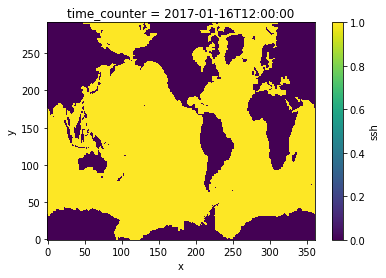

In [90]:
mask.plot()

In [91]:
mask.astype(int)

<xarray.DataArray 'ssh' (y: 292, x: 362)>
dask.array<sub, shape=(292, 362), dtype=int64, chunksize=(146, 181), chunktype=numpy.ndarray>
Coordinates:
    nav_lat       (y, x) float64 dask.array<chunksize=(146, 181), meta=np.ndarray>
    nav_lon       (y, x) float64 dask.array<chunksize=(146, 181), meta=np.ndarray>
    time_counter  datetime64[ns] 2017-01-16T12:00:00
Dimensions without coordinates: y, x

In [82]:
import numpy as np
np.where(np.isnan(truc)==True)

(array([  0,   0,   0, ..., 291, 291, 291]),
 array([  0,   1,   2, ..., 359, 360, 361]))

In [ ]:
id_f[ncvar][0,:,:].

In [92]:
what='longitude'

In [93]:
    cv_coor_test = nmp.array([[ 'lat','latitude', 'nav_lat','gphit','LATITUDE', 'none' ],
                              [ 'lon','longitude','nav_lon','glamt','LONGITUDE','none' ]])
    if   what ==  'latitude': ii = 0
    elif what == 'longitude': ii = 1
    else: MsgExit(' "what" argument of "GetModelCoor()" only supports "latitude" and "longitude"')
    #
    id_f = xr.open_zarr(ncfile)
    for ncvar in cv_coor_test[ii,:]:
        if ncvar in id_f.coords: break
    if ncvar == 'none': MsgExit('could not find '+what+' array into model file')
    #
    nb_dim = len(id_f[ncvar].dims)
    if   nb_dim==1: MsgExit('FIX ME! Model '+what+' is 1D')
    elif nb_dim==2: xwhat = id_f[ncvar][:,:]
    elif nb_dim==3: xwhat = id_f[ncvar][0,:,:]
    else: MsgExit('FIX ME! Model '+what+' has a weird number of dimensions')

In [104]:
X=xwhat.values

In [105]:
    ny = X.shape[0]
    vx = nmp.abs(X[ny//2,1:] - X[ny//2,:-1])
    res = nmp.mean( vx[nmp.where(vx < 5.)] )

In [106]:
print(res)

1.0


In [108]:
nmp.amin(xwhat.values)

-179.9965362548828

In [109]:
nmp.copysign(1., 180.-X)*nmp.minimum(X, nmp.abs(X-360.))

array([[72.5       , 73.5       , 74.5       , ..., 71.5       ,
        72.5       , 73.5       ],
       [72.5       , 73.5       , 74.5       , ..., 71.5       ,
        72.5       , 73.5       ],
       [72.5       , 73.5       , 74.5       , ..., 71.5       ,
        72.5       , 73.5       ],
       ...,
       [72.95764923, 73.04235077, 73.1153183 , ..., 72.8846817 ,
        72.95764923, 73.04235077],
       [72.989151  , 73.010849  , 73.03703308, ..., 72.96296692,
        72.989151  , 73.010849  ],
       [73.        , 72.989151  , 72.96296692, ..., 73.03703308,
        73.        , 72.989151  ]])